In [1]:
import pandas as pd

In [152]:
pd.options.plotting.backend = "matplotlib"

In [137]:
vals = range(21, 25)
indexes = [0,1,1,1]  # first file has no סמל ועדה column
dfs = [pd.read_csv(f"{e}.csv", index_col=i, encoding="iso-8859-8") for e, i in zip(vals, indexes)]

# cleanup NaN columns
del dfs[2]["Unnamed: 37"]
del dfs[3]["Unnamed: 46"]

In [138]:
print(dfs[3].keys())

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת'],
      dtype='object')


In [139]:
static_keys = ["סמל ועדה", "שם ישוב", "בזב", "מצביעים", "פסולים", "כשרים"]

In [141]:
df2 = dfs[2].sort_values(by=['בזב'], ascending=False)[:50]
df3 = dfs[3].sort_values(by=['בזב'], ascending=False)[:50]

<AxesSubplot:xlabel='rates', ylabel='likud'>

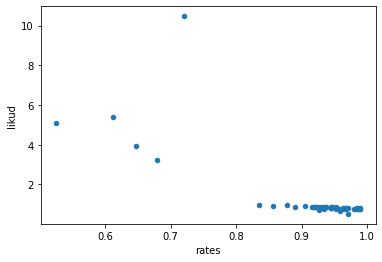

In [155]:
rate3 = df3["מצביעים"] / df3["בזב"]
rate2 = df2["מצביעים"] / df2["בזב"]
lik3 = df3["מחל"] / rate3
lik2 = df2["מחל"] / rate2
odf = pd.DataFrame({
    "rates": rate3 / rate2,
    "likud": lik3 / lik2
})
odf.sort_values(by="rates", ascending=True)[:100]
odf.plot.scatter(x="rates", y="likud")

<AxesSubplot:xlabel='rates', ylabel='mesh'>

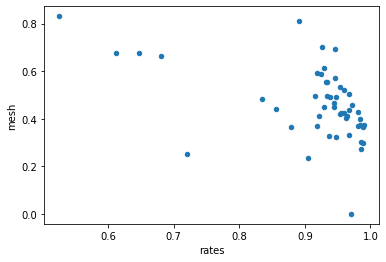

In [159]:
rate3 = df3["מצביעים"] / df3["בזב"]
rate2 = df2["מצביעים"] / df2["בזב"]
mesh3 = df3["ודעם"] / rate3
mesh2 = df2["ודעם"] / rate2
odf = pd.DataFrame({
    "rates": rate3 / rate2,
    "mesh": mesh3 / mesh2
})
odf.sort_values(by="rates", ascending=True)[:100]
odf.plot.scatter(x="rates", y="mesh")